<b>Simple Neural Network in PyTorch</b><br>
--
Coded by : Nub-T

In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
# Create two 1D tensors
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1) 

t_u.shape

torch.Size([11, 1])

In [6]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(train_indices, val_indices)

tensor([0, 3, 7, 5, 2, 8, 9, 6, 4]) tensor([ 1, 10])


In [7]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [14]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) 
print(linear_model(t_un_val))

tensor([[2.4271],
        [2.8320]], grad_fn=<AddmmBackward>)


In [19]:
print("Weight : ",linear_model.weight,"\n\n")
print("Bias : ",linear_model.bias,"\n\n")
x = torch.ones(1)
print("Linear model : ",linear_model(x))

Weight :  Parameter containing:
tensor([[0.3240]], requires_grad=True) 


Bias :  Parameter containing:
tensor([0.6159], requires_grad=True) 


Linear model :  tensor([0.9399], grad_fn=<AddBackward0>)


In [20]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)
linear_model.parameters()

<generator object Module.parameters at 0x000001B7DFC7CDC8>

In [21]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.2708]], requires_grad=True), Parameter containing:
 tensor([0.5954], requires_grad=True)]

In [22]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # The loss function is also passed in. We’ll use it in a moment.
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [29]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # We are no longer using our hand-written loss function from earlier.
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 225.6297, Validation loss 442.4760
Epoch 1000, Training loss 3.5039, Validation loss 5.4164
Epoch 2000, Training loss 2.9523, Validation loss 4.0915
Epoch 3000, Training loss 2.9415, Validation loss 3.9263

Parameter containing:
tensor([[5.2055]], requires_grad=True)
Parameter containing:
tensor([-16.8184], requires_grad=True)


In [31]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 309.7720, Validation loss 590.2087
Epoch 1000, Training loss 3.4884, Validation loss 5.3930
Epoch 2000, Training loss 2.9520, Validation loss 4.0888
Epoch 3000, Training loss 2.9415, Validation loss 3.9259

Parameter containing:
tensor([[5.2056]], requires_grad=True)
Parameter containing:
tensor([-16.8190], requires_grad=True)


In [32]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # We chose 13 arbitrarily. We wanted a number that was a different size from the other tensor shapes we have floating around.
            nn.Tanh(),
            nn.Linear(13, 1)) # This 13 must match the first size, however.
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [33]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [34]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [35]:
# The name of each module in Sequential is just the ordinal with which the module appears in the arguments.
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [36]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [38]:
print(seq_model.output_linear.bias)

Parameter containing:
tensor([0.0616], requires_grad=True)


We’ve dropped the learning rate a bit to help with stability.

In [39]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 153.5358, Validation loss 309.1424
Epoch 1000, Training loss 6.9847, Validation loss 6.5123
Epoch 2000, Training loss 3.2746, Validation loss 0.5637
Epoch 3000, Training loss 1.7589, Validation loss 3.0282
Epoch 4000, Training loss 1.5972, Validation loss 3.5614
Epoch 5000, Training loss 1.5532, Validation loss 3.7296
output tensor([[11.3670],
        [20.2742]], grad_fn=<AddmmBackward>)
answer tensor([[14.],
        [21.]])
hidden tensor([[-0.0060],
        [-0.0114],
        [ 0.0099],
        [-0.0065],
        [-0.0024],
        [-0.0205],
        [ 0.0031],
        [-0.0038]])


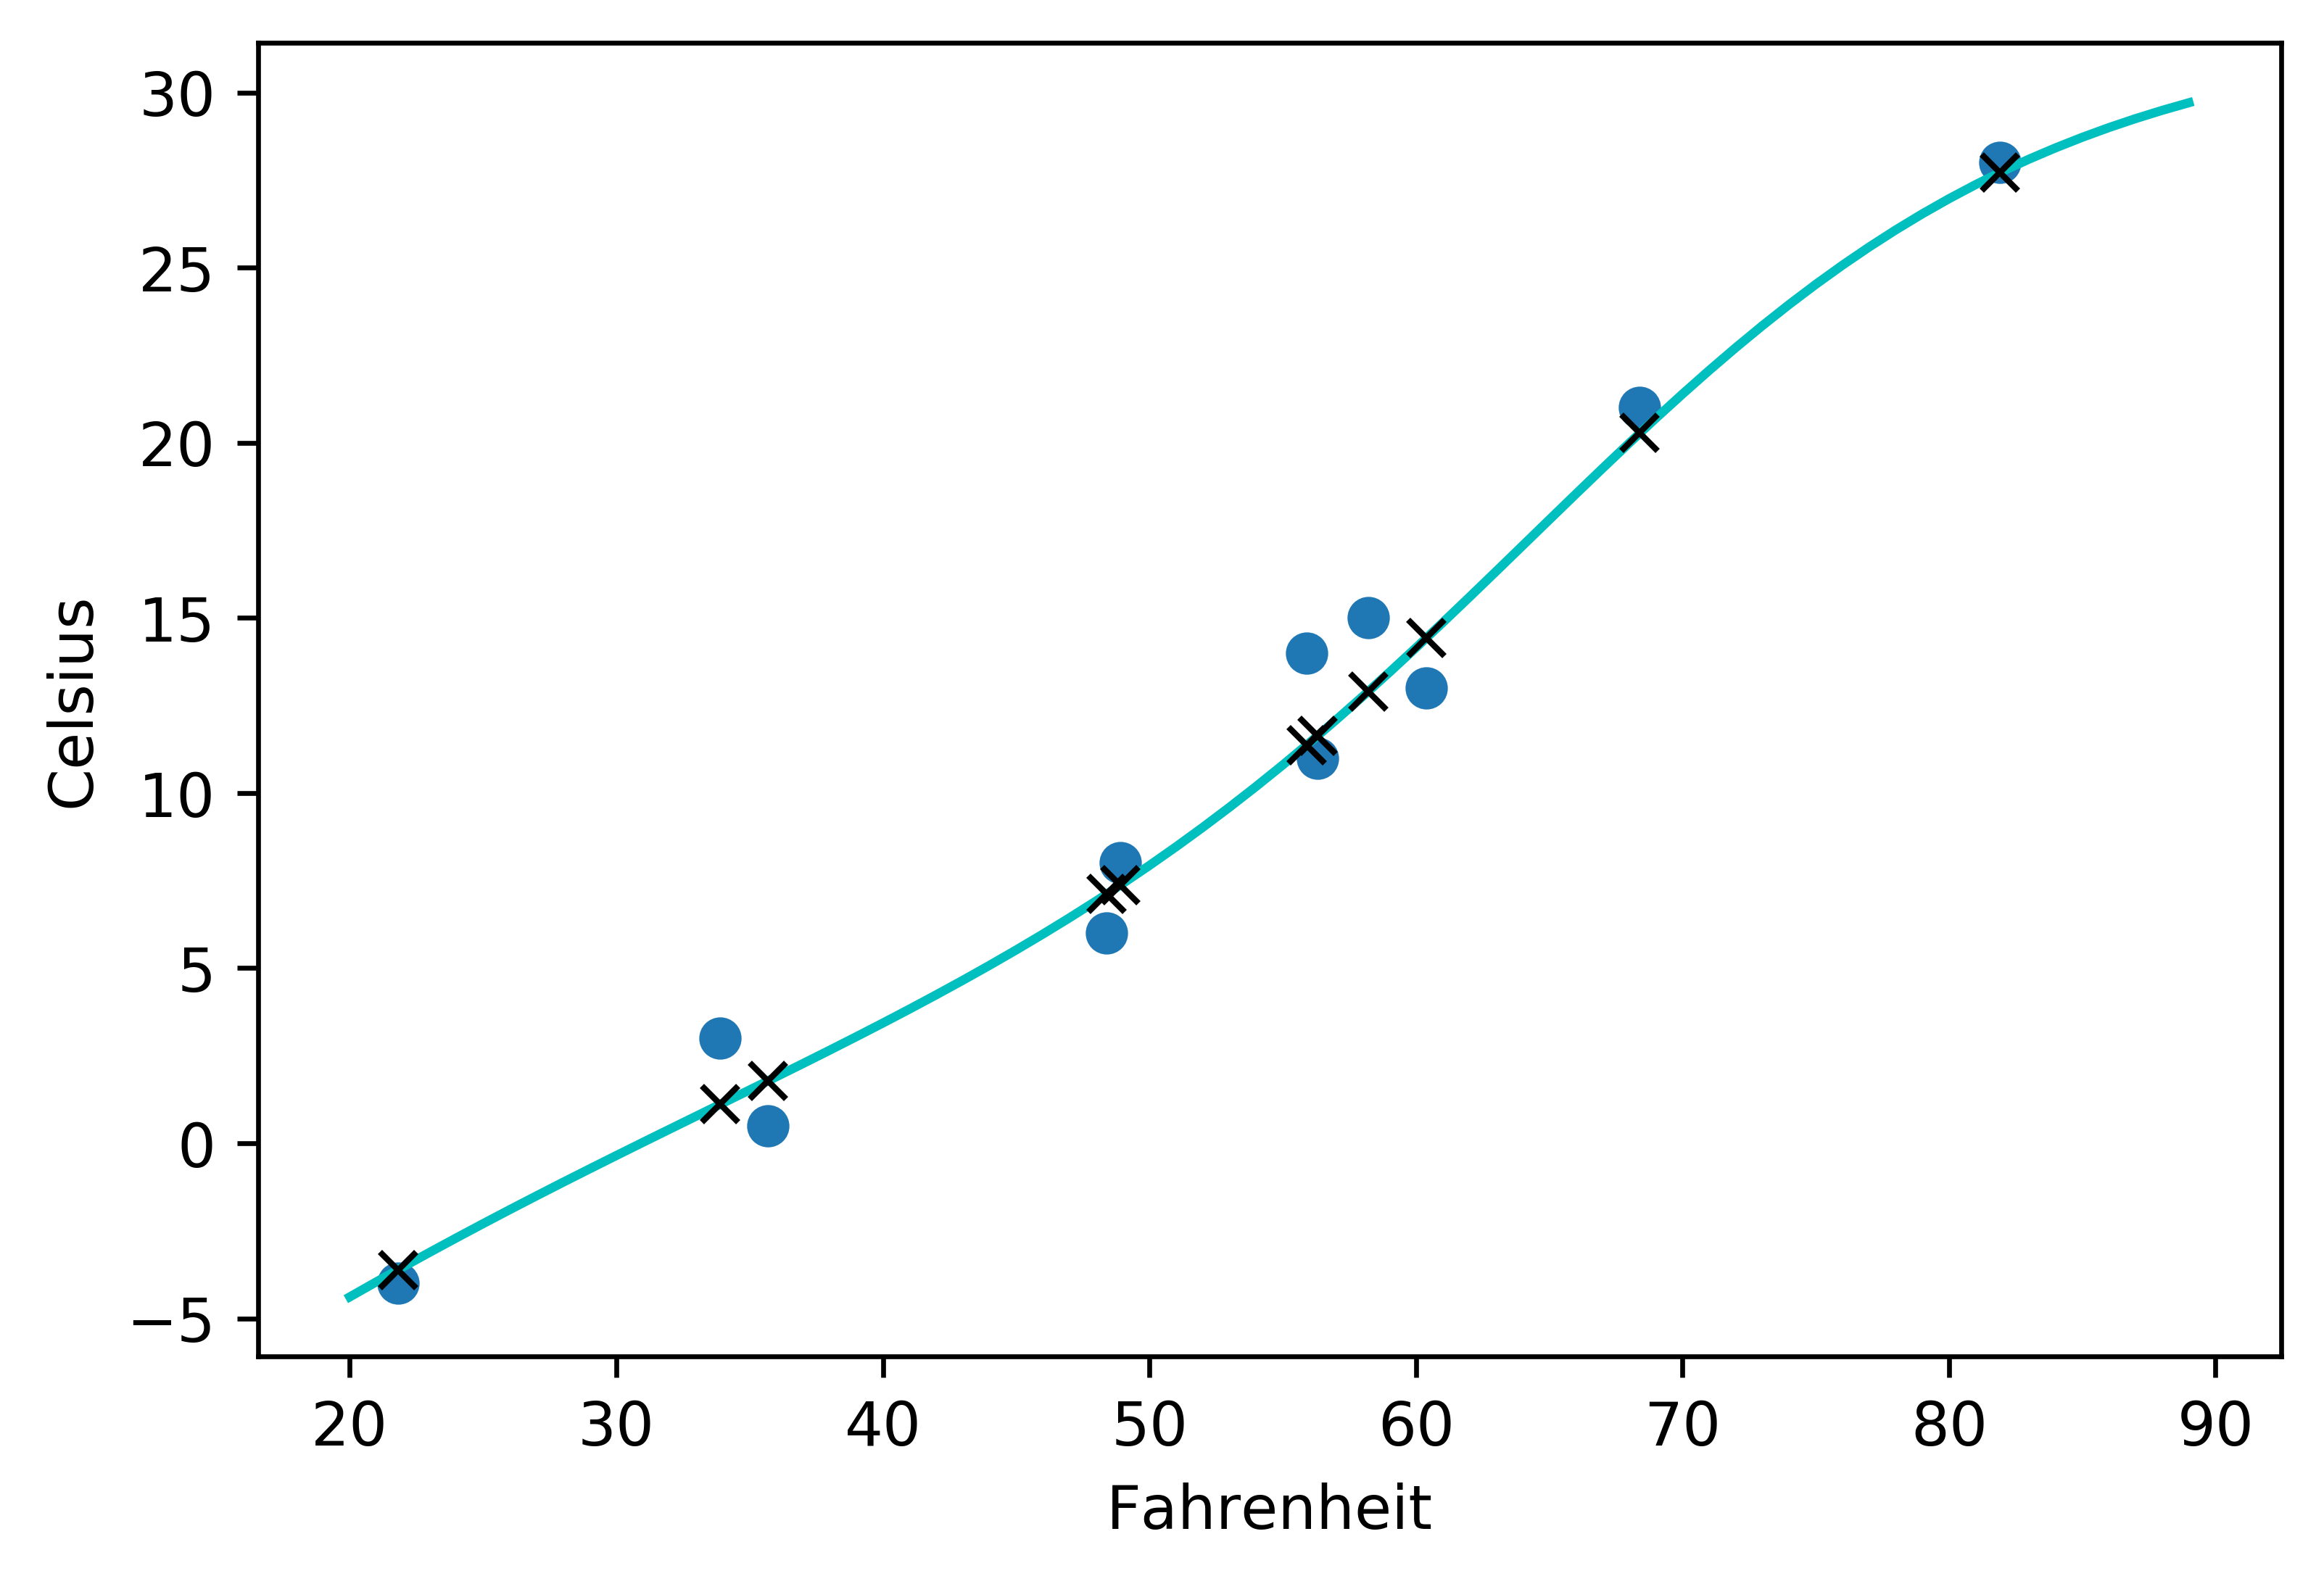

In [42]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 158.0737, Validation loss 318.1141
Epoch 1000, Training loss 65.9064, Validation loss 75.4137
Epoch 2000, Training loss 50.4360, Validation loss 58.5020
Epoch 3000, Training loss 33.7468, Validation loss 39.8543
Epoch 4000, Training loss 21.2004, Validation loss 25.5016
Epoch 5000, Training loss 13.3193, Validation loss 15.8586


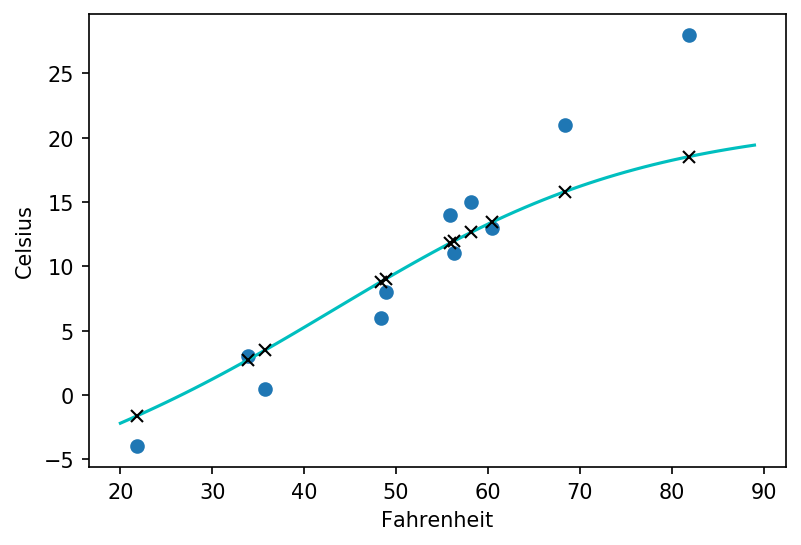

In [43]:
# Obviously overfit the data
neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')